In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


Machine learning process

1. Data preparation
2. Set a model
3. Set a cost function
4. Set a optimizer ( gradient descent )

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/frankkn/DeepLearning/master/LinearRegression/Data/Salary_Data.csv"
data = pd.read_csv(url)
data

x = data["YearsExperience"]
y = data["Salary"]
x
y


0      36.2
1      36.6
2      42.8
3      39.3
4      46.2
5      37.7
6      43.5
7      39.8
8      56.6
9      60.1
10     54.4
11     64.4
12     57.1
13     63.2
14     55.7
15     56.9
16     57.0
17     61.1
18     67.9
19     66.0
20     83.0
21     81.3
22     93.9
23     91.7
24     98.2
25    101.3
26    113.8
27    109.4
28    105.5
29    116.9
30    112.6
31    122.3
32    121.8
Name: Salary, dtype: float64

In [1]:
# Add Chinese font (don't forget to download it first using wget)
!pip install wget
import wget
wget.download("https://github.com/frankkn/DeepLearning/blob/master/LinearRegression/Font/ChineseFont.ttf")

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# Plot data
plt.scatter(x, y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪（千）")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

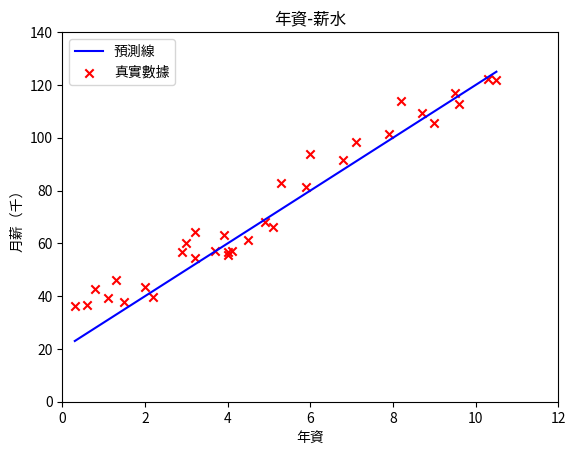

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

In [9]:
# plot prediction line

def plot_pred(w, b):
  y_pred = x*w+b
  plt.plot(x, y_pred, color="blue", label="預測線")
  plt.scatter(x, y, marker="x", color="red", label="真實數據")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪（千）")
  plt.xlim([0, 12])
  plt.ylim([0, 140])
  plt.legend() # 圖例
  plt.show()

plot_pred(10, 20)

# Interactive tool
from ipywidgets import interact
interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

In [10]:
# Cost function
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)
  return cost

compute_cost(x, y, 10, 10)

227.88121212121214

In [11]:
# b = 0, w = -100 ~ 100 cost = ?
costs = []
for w in range(-100, 101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

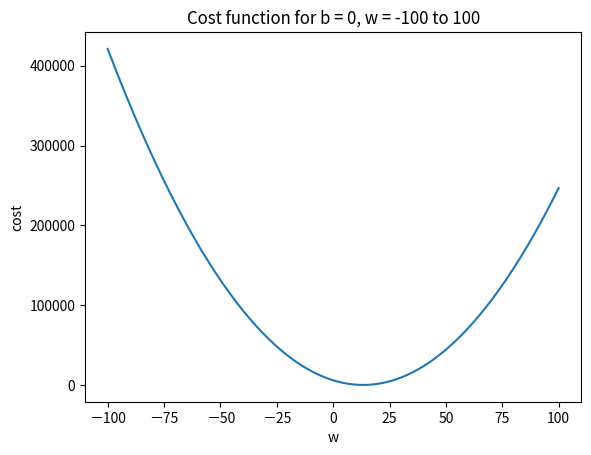

In [12]:
# Draw 2D graph to show cost for above parameters
import matplotlib.pyplot as plt

# plt.scatter(range(-100, 101), costs) # x-axis y-axis
plt.plot(range(-100, 101), costs)
plt.title("Cost function for b = 0, w = -100 to 100")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [13]:
# cost for w = -100 to 100, b = -100 to 100
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j += 1
  i += 1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

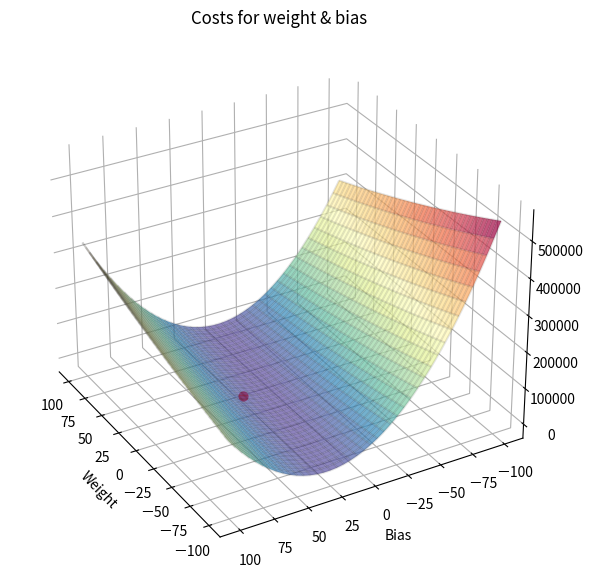

When w = [9] and b = [29], min cost = 32.6948484848485


In [14]:
# Draw 3D graph
plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.xaxis.set_pane_color((1, 1, 1))
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))

w_grid, b_grid = np.meshgrid(ws, bs) # 2d mesh grid
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7) # cmap for color in curved surface
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)
ax.view_init(30, 150) # angle for up/down, angle for left/right

ax.set_title("Costs for weight & bias")
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")

# print(np.min(costs))
w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40) # Draw min point

plt.show()

print(f'When w = {ws[w_index]} and b = {bs[b_index]}, min cost = {np.min(costs)}')

In [15]:
# Gradient descent
def compute_gradient(x, y, w, b):
  w_gradient = (2*x*(w*x+b-y)).mean()
  b_gradient = (2*(w*x+b-y)).mean()
  return w_gradient, b_gradient

def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, print_iter=1000):
  w = w_init
  b = b_init

  w_history = []
  b_history = []
  c_history = []

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient * learning_rate
    b = b - b_gradient * learning_rate
    cost = cost_function(x, y, w, b)

    w_history.append(w)
    b_history.append(b)
    c_history.append(cost)

    if i % print_iter == 0:
      print(f'Iteration {i:5}: Cost {cost:.4e}, w {w:.2e}, b {b:.2e}, w_gradient {w_gradient: .2e}, b_gradient {b_gradient: .2e}')
  return w, b, w_history, b_history, c_history

w_init = -100
b_init = -100
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_history, b_history, c_history = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0: Cost 4.7317e+05, w -9.16e+01, b -9.87e+01, w_gradient -8.40e+03, b_gradient -1.32e+03
Iteration  1000: Cost 1.1491e+03, w 1.87e+01, b -3.60e+01, w_gradient  5.13e+00, b_gradient -3.42e+01
Iteration  2000: Cost 4.1627e+02, w 1.48e+01, b -9.49e+00, w_gradient  3.01e+00, b_gradient -2.00e+01
Iteration  3000: Cost 1.6436e+02, w 1.24e+01, b 6.02e+00, w_gradient  1.76e+00, b_gradient -1.17e+01
Iteration  4000: Cost 7.7765e+01, w 1.11e+01, b 1.51e+01, w_gradient  1.03e+00, b_gradient -6.89e+00
Iteration  5000: Cost 4.8000e+01, w 1.03e+01, b 2.05e+01, w_gradient  6.06e-01, b_gradient -4.04e+00
Iteration  6000: Cost 3.7769e+01, w 9.79e+00, b 2.36e+01, w_gradient  3.55e-01, b_gradient -2.37e+00
Iteration  7000: Cost 3.4252e+01, w 9.51e+00, b 2.54e+01, w_gradient  2.08e-01, b_gradient -1.39e+00
Iteration  8000: Cost 3.3043e+01, w 9.35e+00, b 2.65e+01, w_gradient  1.22e-01, b_gradient -8.14e-01
Iteration  9000: Cost 3.2627e+01, w 9.26e+00, b 2.71e+01, w_gradient  7.16e-02, b_gradi

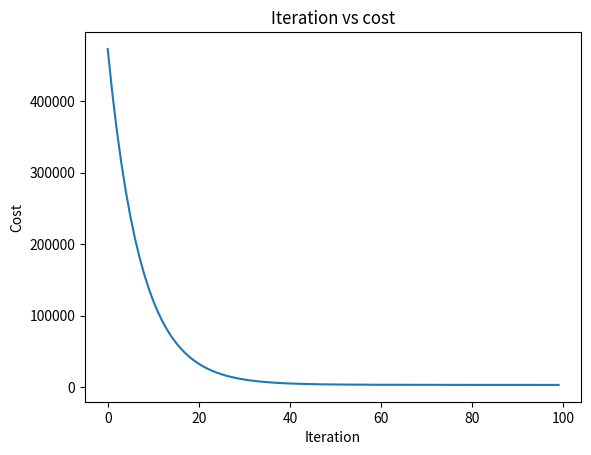

In [16]:
# Show the cost of previous 100 updates
import matplotlib.pyplot as plt
import numpy as np

# plt.plot(np.arange(0, 20000), c_history)
plt.plot(np.arange(0, 100), c_history[:100])
plt.title('Iteration vs cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [17]:
# cost for w = -100 to 100, b = -100 to 100
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j += 1
  i += 1

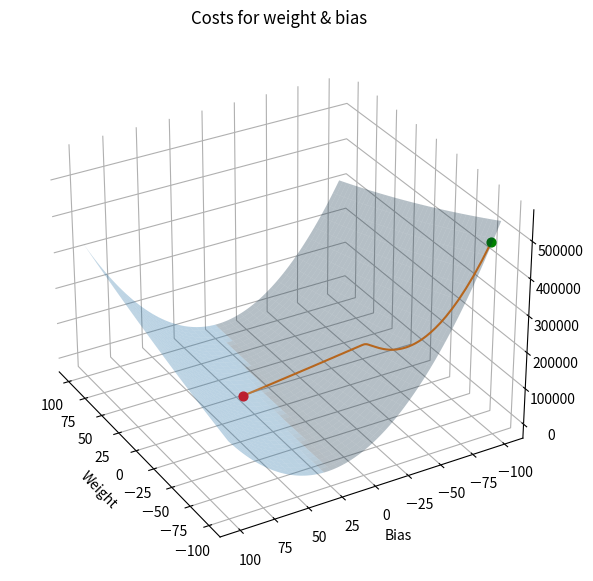

When w = [9] and b = [29], min cost = 32.6948484848485


In [18]:
# Draw 3D graph
plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.xaxis.set_pane_color((1, 1, 1))
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))

w_grid, b_grid = np.meshgrid(ws, bs) # 2d mesh grid
ax.plot_surface(w_grid, b_grid, costs, alpha=0.3) # cmap for color in curved surface
# ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)
ax.view_init(30, 150) # angle for up/down, angle for left/right

ax.set_title("Costs for weight & bias")
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")

# print(np.min(costs))
w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40) # Draw min point
ax.scatter(w_history[0], b_history[0], c_history[0], color='green', s=40) # Draw init point for w = 0, b = 0
ax.plot(w_history, b_history, c_history) # Draw gradient descent lines

plt.show()

print(f'When w = {ws[w_index]} and b = {bs[b_index]}, min cost = {np.min(costs)}')

In [19]:
print(f'Final w: {w_final:.2f}, final b: {b_final:.2f}')

Final w: 9.12, final b: 28.01


In [20]:
print(f'Working experience: 3.5 years, Predicted salary: {w_final * 3.5 + b_final:.1f}K')

Working experience: 3.5 years, Predicted salary: 59.9K
